# ESMCMC: Richness-Mass Scaling Relation Calibration

---
**License**

 ESMCMC_RM_SR_Models

 Mon Nov 11 10:30:00 2024\
 Copyright  2024\
 Cinthia Nunes de Lima <cinthia.n.lima@uel.br> \ Sandro Dias Pinto Vitenti <vitenti@uel.br>

---
---

 ESMCMC_RM_SR_Models\
 Copyright (C) 2024 Cinthia Nunes de Lima <cinthia.n.lima@uel.br>, Sandro Dias Pinto Vitenti <vitenti@uel.br>

 numcosmo is free software: you can redistribute it and/or modify it
 under the terms of the GNU General Public License as published by the
 Free Software Foundation, either version 3 of the License, or
 (at your option) any later version.

 numcosmo is distributed in the hope that it will be useful, but
 WITHOUT ANY WARRANTY; without even the implied warranty of
 MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
 See the GNU General Public License for more details.

 You should have received a copy of the GNU General Public License along
 with this program.  If not, see <http://www.gnu.org/licenses/>.
 
---

## Settings

In [1]:
import sys
sys.path.insert(0, "/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/")
sys.path.insert(0, "/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/ESMCMC")

from esmcmc_rm_relation_script import catalog_fit, esmcmc

#NumCosmo
from numcosmo_py import Ncm, Nc, GObject
Ncm.cfg_init()
Ncm.cfg_set_log_handler(lambda msg: sys.stdout.write(msg) and sys.stdout.flush())

#Useful packages
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

import matplotlib as mpl


#GCR Catalogs
sys.path.insert(0, "/global/homes/c/cinlima/gcr-catalogs")
import GCRCatalogs
GCRCatalogs.set_root_dir_by_site("nersc")

#Corner plots 
from getdist import plots
from getdist.mcsamples import  MCSamples
import getdist
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

import pygtc
from IPython.display import display, Math
%matplotlib inline

from numcosmo_py.plotting.tools import set_rc_params_article      # imports Numcosmo plotting tools
set_rc_params_article(ncol=1)

import warnings


GetDist Version: 1.5.3, Matplotlib version: 3.10.0


## Data

In [2]:
RICH_CUT = 5
MASS_CUT = 0

Catalog info:
Catalog size: 39600
Richness: min: 5.01; max: 266.30.
Redshift: min: 0.08; max: 1.20.
Mass: min: 1e+13; max: 1.9e+15.

Cut data:
Catalog size: 39600.
Richness: min: 5.01; max: 266.30
Mass: min: 1e+13; max: 1.9e+15.


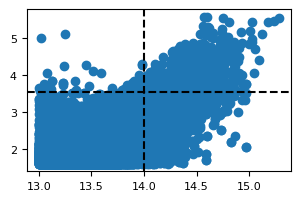

In [3]:
cDC2 = Table.read('../CatalogsMatching/match_ID.fits').to_pandas()

rich_data = cDC2["richness"]
z_data = cDC2["redshift"]
mass_data = cDC2["halo_mass"]

cDC2_data = Table([mass_data, rich_data, z_data], names=('mass', 'richness', 'redshift'))
rich_data
#Data cut:
cDC2_data = cDC2_data[cDC2_data['richness'] > RICH_CUT]
cDC2_data = cDC2_data[cDC2_data['mass'] > MASS_CUT]

print(f'Catalog info:\nCatalog size: {len(rich_data)}\nRichness: min: {min( rich_data):.2f}; max: {max(rich_data):.2f}.\nRedshift: min: {min( z_data):.2f}; max: {max(z_data):.2f}.\nMass: min: {min( mass_data):.2}; max: {max(mass_data):.2}.\n')

richness_dt = cDC2_data['richness']
mass_dt = cDC2_data['mass']

print(f'Cut data:\nCatalog size: {len(cDC2_data)}.\nRichness: min: {min(richness_dt):.2f}; max: {max(richness_dt):.2f}\nMass: min: {min( mass_dt):.2}; max: {max(mass_dt):.2}.')

plt.scatter(np.log10(mass_dt), np.log(richness_dt))
plt.axline((13, np.log(35)), (15, np.log(35)), c = 'k', ls= '--')
plt.axvline(x = np.log10(1e14), color = 'k', ls= '--')


## Quadratic Model MCMC

In [4]:
# N_WALKERS = 1200
# N_RUN = 300
# MODEL = 'ext'
# FILE_NAME = "full_data_set_mcmc/"+MODEL+".fits"

# esmcmc(cDC2_data, RICH_CUT, N_WALKERS, N_RUN, MODEL, FILE_NAME)


## Linear Model MCMC

In [5]:
# N_WALKERS = 1200
# N_RUN = 300
# MODEL2 = 'asc_without_corretion'
# FILE_NAME2 ="/global/homes/c/cinlima/ESMCMC/full_data_set_mcmc/"+MODEL2+".fits"

# esmcmc(cDC2_data, RICH_CUT, N_WALKERS, N_RUN, 'asc', FILE_NAME2)

## Bayes Factor

Given two models $M_{1}$ and $M_2$, with parameters vectors $\theta_{1}$ and $\theta_{2}$, for a oberved data D, the Bayes Factor is defined as (see [Kass and Raftery, 1995](https://sites.stat.washington.edu/raftery/Research/PDF/kass1995.pdf]) and [John and Narlikar, 2002](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.65.043506), for more details):

$$
BF = \frac{P(D|M_{1})}{P(D|M_{2})} =  \frac{\int d\theta_{1} P(D|\theta_{1}, M_{1}) P(\theta_{1}, M_{1}) }{\int d\theta_{2} P(D|\theta_{2}, M_{2}) P(\theta_{2}, M_{2})}. 
$$

Where, $P(D|M_{1})$ and $P(D|M_{2})$ are the likelihood and, $P(\theta_{1}, M_{1})$ and $P(\theta_{2}, M_{2})$ are the priors for parameters $\theta_{1}$ and $\theta_{2}$.


BF interpretation, according to Kass and Raftery, 1995:

$\log_{10}$BF| BF | Strength of evidence|
| --------: | --------: | :------- |
|0 < $\log_{10}$BF < 1/2| 1 < BF < 3.2  |  Not worth more than a bare mention|
| 1/2 < $\log_{10}$BF < 1| 3.2 < BF < 10 |  Substantial|
| 1 < $\log_{10}$BF < 2| 10 < BF < 100| Strong|
| $\log_{10}$BF > 2| BF > 100|  Decisive|







### Bayes Factor (full data set)

In [6]:
# # Bayesian Evidence Quadratic Model:

# N_WALKERS1 = 1200
# BURNIN1 = 55
# FILE_NAME = "/global/homes/c/cinlima/ESMCMC/full_data_set_mcmc/ext.fits"
# mcat1 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME, N_WALKERS1 * BURNIN1)
# be1, post_lnnorm_sd1 = mcat1.get_post_lnnorm()
# # lnevol, glnvol = mcat2.get_post_lnvol(0.6827)
# # Bayesian Evidence Linear Model:

# BURNIN2 = 75
# N_WALKERS2 = 1200
# FILE_NAME2 = "/global/homes/c/cinlima/ESMCMC/full_data_set_mcmc/asc.fits"
# mcat2 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME2, N_WALKERS2 * BURNIN2)
# be2, post_lnnorm_sd2 = mcat2.get_post_lnnorm()
# # lnevol, glnvol = mcat2.get_post_lnvol(0.6827)

# print(f'BEQ = {be1:.3f} +/- {post_lnnorm_sd1:.3f}.\nBEL = {be2:.3f} +/- {post_lnnorm_sd2:.3f}.\n\nBF = {np.exp(be1 - be2):.3e}.')


# Bayesian Evidence Quadratic Model:

N_WALKERS1 = 1200
BURNIN1 = 55
FILE_NAME = "/global/homes/c/cinlima/ESMCMC/with_correction/asc_rmin_5_mmin_10000000000000.0.fits"
mcat1 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME, N_WALKERS1 * BURNIN1)
be1, post_lnnorm_sd1 = mcat1.get_post_lnnorm()
# lnevol, glnvol = mcat2.get_post_lnvol(0.6827)
# Bayesian Evidence Linear Model:

BURNIN2 = 75
N_WALKERS2 = 1200
FILE_NAME2 = "/global/homes/c/cinlima/ESMCMC/full_data_set_mcmc/asc_without_corretion.fits"
mcat2 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME2, N_WALKERS2 * BURNIN2)
be2, post_lnnorm_sd2 = mcat2.get_post_lnnorm()
# lnevol, glnvol = mcat2.get_post_lnvol(0.6827)

print(f'BEQ = {be1:.3f} +/- {post_lnnorm_sd1:.3f}.\nBEL = {be2:.3f} +/- {post_lnnorm_sd2:.3f}.\n\nBF = {np.exp(be1 - be2):.3e}.')

BEQ = 28042.512 +/- 0.012.
BEL = 16997.836 +/- 0.017.

BF = inf.


/tmp/ipykernel_1346610/2944436506.py:38: RuntimeWarning: overflow encountered in exp
  print(f'BEQ = {be1:.3f} +/- {post_lnnorm_sd1:.3f}.\nBEL = {be2:.3f} +/- {post_lnnorm_sd2:.3f}.\n\nBF = {np.exp(be1 - be2):.3e}.')


BEQ - Beyesian evidence - quadratic model.

BEL - Beyesian evidence - linear model.

BF - Bayes factor.

### Analysis using mass and richness thresholds

#### MCMC 

In [7]:
# RICH_CUT_list = [50]
# MASS_CUT_list = [1e13, 2e13, 5e13, 8e13, 1e14]

# cDC2 = Table.read('../CatalogsMatching/match_ID.fits').to_pandas()
    
# rich_data = cDC2["richness"]
# z_data = cDC2["redshift"]
# mass_data = cDC2["halo_mass"]
   

# for RICH_CUT in RICH_CUT_list:
#     for MASS_CUT in MASS_CUT_list:

     
#         cDC2_data = Table([mass_data, rich_data, z_data], names=('mass', 'richness', 'redshift'))
        
#         #Data cut:
#         cDC2_data = cDC2_data[cDC2_data['richness'] > RICH_CUT]
#         cDC2_data = cDC2_data[cDC2_data['mass'] > MASS_CUT]#         mu0 = mcat2.get_bestfit_row().dup_array()[1]
#         # sd_mu0 = mcat2.peek_pstats().get_sd(1)
    
#         mu1 = mcat2.get_bestfit_row().dup_array()[2]
#         # sd_mu1 = mcat2.peek_pstats().get_sd(2)
    
#         mu2 = mcat2.get_bestfit_row().dup_array()[3]
#         # sd_mu2 = mcat2.peek_pstats().get_sd(3)
    
#         bf = np.exp(be1 - be2)
            
            
#         data_fit_full = pd.DataFrame(fits.open(FILE_NAME2)[1].data).iloc[:, 1:7].T
#         data_fit_void = np.array(data_fit_full)
#         data_fit = []
#         for item in data_fit_void:
#             arr= np.array(item)
#             data_fit.append(np.asarray(arr.tolist()))
            
#         names = [
#             '1',
#             '2',
#             '3',
#             '4',
#             '5',
#             '6',
#         ]
#         labels=[r"\mu_{0}", r"\mu_{1}", r"\mu_{2}", r"\sigma_{0}", r"\sigma_{1}", r"\sigma_{2}"]
#         settings = {
#             "mult_bias_correction_order": 0,
#             "smooth_scale_2D": 3,
#             "smooth_scale_1D": 3,
#             "boundary_correction_order": 0,
#         }
#         samples1 = MCSamples(samples=data_fit, names=names, labels=labels, settings=settings)
#         samples1.removeBurn(0.3)
            
#         mu0_sup = samples1.get1DDensity(0).getLimits(0.95)[0]
#         mu0_inf = samples1.get1DDensity(0).getLimits(0.95)[1]
    
#         mu1_sup = samples1.get1DDensity(1).getLimits(0.95)[0]
#         mu1_inf = samples1.get1DDensity(1).getLimits(0.95)[1]
    
#         mu2_sup = samples1.get1DDensity(2).getLimits(0.95)[0]
#         mu2_inf = samples1.get1DDensity(2).getLimits(0.95)[1]
            
                    
#         bef = pd.concat([bef, pd.DataFrame([{'Min_Mass':mcut, 'Min_Richness': rcut,  'BEQ': be1, 
#                                                 'BEQ Err': post_lnnorm_sd1, 'BEL': be2, 'BEL Err':post_lnnorm_sd2, 
#                                                 'BF': bf, 
#                                                 'mu0':mu0, 'mu0_sup': mu0_sup, 'mu0_inf': mu0_inf, 
#                                                 'mu1':mu1, 'mu1_sup': mu1_sup, 'mu1_inf': mu1_inf, 
#                                                 'mu2':mu2, 'mu2_sup': mu2_sup, 'mu2_inf': mu2_inf}])], ignore_index=True)
    
#         # bef = pd.concat([bef, pd.DataFrame([{'Min_Mass':mcut, 'Min_Richness': rcut,  'BEQ': be1, 
#         #                                      'BEQ Err': post_lnnorm_sd1, 'BEL': be2, 'BEL Err':post_lnnorm_sd2, 
#         #                                      'BF': bf, 'muM2':muM2, 'sd_muM2': sd_muM2}])], ignore_index=True)
    
#         cDC2_data = Table([mass_data, rich_data, z_data], names=('mass', 'richness', 'redshift'))
            
#         #Data cut:
#         cDC2_data = cDC2_data[cDC2_data['richness'] > rcut]
#         cDC2_data = cDC2_data[cDC2_data['mass'] > mcut]
#         lnM = np.log(cDC2_data['mass'])
#         z = cDC2_data['redshift']
    
            
#     bef_list.append(bef)


        
#         N_WALKERS = 1200
#         N_RUN = 300
        
#         # MODEL = 'ext'
#         # FILE_NAME = "/global/homes/c/cinlima/ESMCMC/without_correction/"+MODEL+"_rmin_"+str(RICH_CUT)+"_mmin_"+str(MASS_CUT)+".fits"
    
#         # esmcmc(cDC2_data, RICH_CUT, N_WALKERS, N_RUN, MODEL, FILE_NAME)
    
#         MODEL2 = 'asc'
#         FILE_NAME2 = "/global/homes/c/cinlima/ESMCMC/with_correction/"+MODEL2+"_rmin_"+str(RICH_CUT)+"_mmin_"+str(MASS_CUT)+".fits"
    
#         esmcmc(cDC2_data, RICH_CUT, N_WALKERS, N_RUN, MODEL2, FILE_NAME2)



In [8]:
# RICH_CUT_list = [5, 10, 15, 20, 30, 40, 50]
# MASS_CUT_list = [1e13, 2e13, 5e13, 8e13, 1e14]

# bef_list = []
# mean_ext_list = []

# for mcut in MASS_CUT_list:

#     # bef = pd.DataFrame(data = {'Min_Mass':[], 'Min_Richness': [], 'BEQ': [], 'BEQ Err': [], 'BEL': [], 'BEL Err': [], 
#     #                            'BF': [], 'muM2': [], 'sd_muM2': []})

#     bef = pd.DataFrame(data = {'Min_Mass':[], 'Min_Richness': [],  'BEQ': [], 
#                                              'BEQ Err': [], 'BEL': [], 'BEL Err':[], 
#                                              'BF': [], 'muM2':[], 'sd_muM2': [], 
#                                              'mu0':[], 'sd_mu0': [], 'mu1':[], 'sd_mu1': [],
#                                              'mu2':[], 'sd_mu2': []})


#     mean_ext = []

#     for rcut in RICH_CUT_list:
        
#         N_WALKERS = 1200
#         N_RUN = 300
        
#         RICH_CUT = rcut
#         MASS_CUT = mcut
        
#         # MODEL = 'ext'
#         # FILE_NAME1 = "/global/homes/c/cinlima/ESMCMC/r_threshold_mcmc/"+MODEL+"_rmin_"+str(RICH_CUT)+"_mmin_"+str(MASS_CUT)+".fits"   
        
#         # MODEL2 = 'asc'
#         # FILE_NAME2 = "/global/homes/c/cinlima/ESMCMC/r_threshold_mcmc/"+MODEL2+"_rmin_"+str(RICH_CUT)+"_mmin_"+str(MASS_CUT)+".fits"

#         MODEL1 = 'asc'
#         FILE_NAME1 = "/global/homes/c/cinlima/ESMCMC/r_threshold_mcmc/"+MODEL1+"_rmin_"+str(RICH_CUT)+"_mmin_"+str(MASS_CUT)+".fits"   
       
#         MODEL2 = 'asc'
#         FILE_NAME2 = "/global/homes/c/cinlima/ESMCMC/without_correction/"+MODEL2+"_rmin_"+str(RICH_CUT)+"_mmin_"+str(MASS_CUT)+".fits"


#         burnin_cat1 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME1, 0.0).peek_e_mean_stats().estimate_const_break(0) + 10  
#         mcat1 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME1, N_WALKERS * burnin_cat1)
#         be1, post_lnnorm_sd1 = mcat1.get_post_lnnorm()
#         # lnevol1, glnvol1 = mcat1.get_post_lnvol(0.6827)

#         burnin_cat2 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME2, 0.0).peek_e_mean_stats().estimate_const_break(0) + 10  
#         mcat2 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME2, N_WALKERS * burnin_cat2)
#         be2, post_lnnorm_sd2 = mcat2.get_post_lnnorm()
#         # lnevol2, glnvol2 = mcat2.get_post_lnvol(0.6827)

#         mcat1 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME1, N_WALKERS * burnin_cat1)
#         mset1 = mcat1.get_mset()

#         muM2 = mcat1.get_bestfit_row().dup_array()[4]
#         sd_muM2 = mcat1.peek_pstats().get_sd(4) 

#         mu0 = mcat2.get_bestfit_row().dup_array()[1]
#         sd_mu0 = mcat2.peek_pstats().get_sd(1)

#         mu1 = mcat2.get_bestfit_row().dup_array()[2]
#         sd_mu1 = mcat2.peek_pstats().get_sd(2)

#         mu2 = mcat2.get_bestfit_row().dup_array()[3]
#         sd_mu2 = mcat2.peek_pstats().get_sd(3)

#         bf = np.exp(be1 - be2)
        
#         bef = pd.concat([bef, pd.DataFrame([{'Min_Mass':mcut, 'Min_Richness': rcut,  'BEQ': be1, 
#                                              'BEQ Err': post_lnnorm_sd1, 'BEL': be2, 'BEL Err':post_lnnorm_sd2, 
#                                              'BF': bf, 'muM2':muM2, 'sd_muM2': sd_muM2, 
#                                              'mu0':mu0, 'sd_mu0': sd_mu0, 'mu1':mu1, 'sd_mu1': sd_mu1, 'mu2':mu2, 'sd_mu2': sd_mu2}])], ignore_index=True)

#         # bef = pd.concat([bef, pd.DataFrame([{'Min_Mass':mcut, 'Min_Richness': rcut,  'BEQ': be1, 
#         #                                      'BEQ Err': post_lnnorm_sd1, 'BEL': be2, 'BEL Err':post_lnnorm_sd2, 
#         #                                      'BF': bf, 'muM2':muM2, 'sd_muM2': sd_muM2}])], ignore_index=True)

#         cDC2_data = Table([mass_data, rich_data, z_data], names=('mass', 'richness', 'redshift'))
        
#         #Data cut:
#         cDC2_data = cDC2_data[cDC2_data['richness'] > rcut]
#         cDC2_data = cDC2_data[cDC2_data['mass'] > mcut]
#         lnM = np.log(cDC2_data['mass'])
#         z = cDC2_data['redshift']

#         mset1.pretty_log()
#         ext = mset1.peek_by_name('NcClusterMass')
#         mean_ext.append(np.array([ext.get_mean(lnM[i], z[i]) for i in range(len(lnM))]))
    
#     mean_ext_list.append(mean_ext)
#     bef_list.append(bef)

In [9]:
def float_to_latex_sci(x, precision=2):

    if x == 0:
        return f"{0:.{precision}f}"

    sci_str = f"{x:.{precision}e}"
    base, exponent = sci_str.split('e')
    exponent = int(exponent)

    return f"${base} \\times 10^{{{exponent}}}$"
        

In [24]:
RICH_CUT_list = [5, 10, 15, 20, 30, 40, 50]
MASS_CUT_list = [1e13, 2e13, 5e13, 8e13, 1e14]
    
bef_list = []
mean_ext_list = []
    
for mcut in MASS_CUT_list:
    
    # bef = pd.DataFrame(data = {'Min_Mass':[], 'Min_Richness': [], 'BEQ': [], 'BEQ Err': [], 'BEL': [], 'BEL Err': [], 
    #                            'BF': [], 'muM2': [], 'sd_muM2': []})
    
    bef = pd.DataFrame(data = {'Min_Mass':[], 'Min_Richness': [],  
                                                'mu0':[], 'mu0_sup': [], 'mu0_inf': [], 
                                                'mu1':[], 'mu1_sup': [], 'mu1_inf': [], 
                                                'mu2':[], 'mu2_sup': [], 'mu2_inf': [],
                                                'sigma0':[], 'sigma0_sup': [], 'sigma0_inf': [], 
                                                'sigma1':[], 'sigma1_sup': [], 'sigma1_inf': [], 
                                                'sigma2':[], 'sigma2_sup': [], 'sigma2_inf': [],
                                                'BEQ': [], 'BEQ Err': [], 'BEL': [], 
                                                'BEL Err':[], 'ln(BF)': []})
         
    
    for rcut in RICH_CUT_list:
            
        N_WALKERS = 1200
        N_RUN = 300
            
        RICH_CUT = rcut
        MASS_CUT = mcut 

        MODEL1 = 'asc'
        FILE_NAME1 = "/global/homes/c/cinlima/ESMCMC/with_correction/"+MODEL1+"_rmin_"+str(RICH_CUT)+"_mmin_"+str(MASS_CUT)+".fits"   
           
        MODEL2 = 'asc'
        FILE_NAME2 = "/global/homes/c/cinlima/ESMCMC/without_correction/"+MODEL2+"_rmin_"+str(RICH_CUT)+"_mmin_"+str(MASS_CUT)+".fits"
    
    
        burnin_cat1 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME1, 0.0).peek_e_mean_stats().estimate_const_break(0) + 10  
        mcat1 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME1, N_WALKERS * burnin_cat1)
        be1, post_lnnorm_sd1 = mcat1.get_post_lnnorm()
        # lnevol1, glnvol1 = mcat1.get_post_lnvol(0.6827)
    
        burnin_cat2 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME2, 0.0).peek_e_mean_stats().estimate_const_break(0) + 10  
        mcat2 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME2, N_WALKERS * burnin_cat2)
        be2, post_lnnorm_sd2 = mcat2.get_post_lnnorm()
        # lnevol2, glnvol2 = mcat2.get_post_lnvol(0.6827)

        mu0 = mcat1.get_bestfit_row().dup_array()[1]
        # sd_mu0 = mcat2.peek_pstats().get_sd(1)
    
        mu1 = mcat1.get_bestfit_row().dup_array()[2]
        # sd_mu1 = mcat2.peek_pstats().get_sd(2)
    
        mu2 = mcat1.get_bestfit_row().dup_array()[3]
        # sd_mu2 = mcat2.peek_pstats().get_sd(3)

        sigma0 = mcat1.get_bestfit_row().dup_array()[4]
        # sd_mu0 = mcat2.peek_pstats().get_sd(1)
    
        sigma1 = mcat1.get_bestfit_row().dup_array()[5]
        # sd_mu1 = mcat2.peek_pstats().get_sd(2)
    
        sigma2 = mcat1.get_bestfit_row().dup_array()[6]
        # sd_mu2 = mcat2.peek_pstats().get_sd(3)
    
        # bf = np.exp(be1 - be2)
       
        # if bf < 1e300:
        #     bf = float_to_latex_sci(bf) 
        
        # else:
        #     bf = '$\infty$'

        lnbf = be1 - be2

        # if np.exp(be1 - be2) > 1e200:
        #     bf = bf.apply(float_to_latex_sci) 
        
        # else:
        #     bf = np.exp(be1 - be2)          
        
        
        data_fit_full = pd.DataFrame(fits.open(FILE_NAME1)[1].data).iloc[:, 1:7].T
        data_fit_void = np.array(data_fit_full)
        data_fit = []
        for item in data_fit_void:
            arr= np.array(item)
            data_fit.append(np.asarray(arr.tolist()))
            
        names = [
            '1',
            '2',
            '3',
            '4',
            '5',
            '6',
        ]
        labels=[r"\mu_{0}", r"\mu_{1}", r"\mu_{2}", r"\sigma_{0}", r"\sigma_{1}", r"\sigma_{2}"]
        settings = {
            "mult_bias_correction_order": 0,
            "smooth_scale_2D": 3,
            "smooth_scale_1D": 3,
            "boundary_correction_order": 0,
        }
        samples1 = MCSamples(samples=data_fit, names=names, labels=labels, settings=settings)
        samples1.removeBurn(0.3)
            
        mu0_inf = samples1.get1DDensity(0).getLimits(0.95)[0]
        mu0_sup = samples1.get1DDensity(0).getLimits(0.95)[1]
    
        mu1_inf = samples1.get1DDensity(1).getLimits(0.95)[0]
        mu1_sup = samples1.get1DDensity(1).getLimits(0.95)[1]
    
        mu2_inf = samples1.get1DDensity(2).getLimits(0.95)[0]
        mu2_sup = samples1.get1DDensity(2).getLimits(0.95)[1]

        sigma0_inf = samples1.get1DDensity(3).getLimits(0.95)[0]
        sigma0_sup = samples1.get1DDensity(3).getLimits(0.95)[1]
    
        sigma1_inf = samples1.get1DDensity(4).getLimits(0.95)[0]
        sigma1_sup = samples1.get1DDensity(4).getLimits(0.95)[1]
    
        sigma2_inf = samples1.get1DDensity(5).getLimits(0.95)[0]
        sigma2_sup = samples1.get1DDensity(5).getLimits(0.95)[1]

            
                    
        bef = pd.concat([bef, pd.DataFrame([{'Min_Mass':mcut, 'Min_Richness': rcut,   
                                                'mu0':mu0, 'mu0_sup': mu0_sup, 'mu0_inf': mu0_inf, 
                                                'mu1':mu1, 'mu1_sup': mu1_sup, 'mu1_inf': mu1_inf, 
                                                'mu2':mu2, 'mu2_sup': mu2_sup, 'mu2_inf': mu2_inf,
                                                'sigma0':sigma0, 'sigma0_sup': sigma0_sup, 'sigma0_inf': sigma0_inf, 
                                                'sigma1':sigma1, 'sigma1_sup': sigma1_sup, 'sigma1_inf': sigma1_inf, 
                                                'sigma2':sigma2, 'sigma2_sup': sigma2_sup, 'sigma2_inf': sigma2_inf,
                                                'BEQ': be1, 'BEQ Err': post_lnnorm_sd1, 'BEL': be2, 
                                                'BEL Err':post_lnnorm_sd2, 'ln(BF)': lnbf}])], ignore_index=True)
    
        # bef = pd.concat([bef, pd.DataFrame([{'Min_Mass':mcut, 'Min_Richness': rcut,  'BEQ': be1, 
        #                                      'BEQ Err': post_lnnorm_sd1, 'BEL': be2, 'BEL Err':post_lnnorm_sd2, 
        #                                      'BF': bf, 'muM2':muM2, 'sd_muM2': sd_muM2}])], ignore_index=True)
    
        cDC2_data = Table([mass_data, rich_data, z_data], names=('mass', 'richness', 'redshift'))
            
        #Data cut:
        cDC2_data = cDC2_data[cDC2_data['richness'] > rcut]
        cDC2_data = cDC2_data[cDC2_data['mass'] > mcut]
        lnM = np.log(cDC2_data['mass'])
        z = cDC2_data['redshift']
    
            
    bef_list.append(bef)



Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


#### Results

In [25]:
bf_datafame = pd.concat(bef_list)
bf_datafame = bf_datafame.reset_index(drop=True)
bf_datafame.head(8)


,Min_Mass,Min_Richness,mu0,mu0_sup,mu0_inf,mu1,mu1_sup,mu1_inf,mu2,mu2_sup,...,sigma1_sup,sigma1_inf,sigma2,sigma2_sup,sigma2_inf,BEQ,BEQ Err,BEL,BEL Err,ln(BF)
0,1.000000e+13,5.0,4.017575,4.042181,3.992490,1.052889,1.070633,1.034445,0.293542,0.360154,...,-0.047731,-0.056684,-0.045707,-0.010995,-0.077144,28042.472079,0.001414,16944.681507,0.501401,11097.790572
1,1.000000e+13,10.0,4.035135,4.065900,4.003982,1.072108,1.108397,1.039697,0.332789,0.461169,...,-0.040371,-0.054660,0.048540,0.100203,-0.013410,10132.131574,0.001326,5713.064462,0.490256,4419.067113
2,1.000000e+13,15.0,4.009501,4.039860,3.969938,1.022499,1.072441,0.970294,0.417395,0.600254,...,-0.034965,-0.055914,-0.022822,0.057836,-0.105568,5248.891943,0.001306,3182.425633,0.001709,2066.466309
3,1.000000e+13,20.0,3.994987,4.029576,3.947746,1.001459,1.069774,0.928262,0.608515,0.824420,...,-0.022569,-0.048629,-0.075732,0.035447,-0.172996,3500.952708,0.001262,2156.002991,0.517764,1344.949718
4,1.000000e+13,30.0,4.029517,4.080601,3.959410,0.976172,1.102681,0.878506,0.678902,1.060155,...,-0.016278,-0.052594,-0.119414,0.032451,-0.273656,1831.420608,0.001328,1202.996789,0.001534,628.423819
5,1.000000e+13,40.0,4.080895,4.150766,3.956283,0.965679,1.156193,0.837590,0.801906,1.315127,...,-0.022882,-0.073864,-0.284391,-0.102926,-0.479742,1061.008814,0.001296,713.506919,0.001724,347.501894
6,1.000000e+13,50.0,4.093302,4.188726,3.836242,1.000239,1.326717,0.854936,0.713802,1.489895,...,-0.044191,-0.122427,-0.272991,-0.066234,-0.526509,677.259888,0.001322,450.737806,0.001577,226.522082
7,2.000000e+13,5.0,3.976912,4.003841,3.950667,0.991388,1.009842,0.973540,0.243266,0.304951,...,0.013336,0.000149,-0.081357,-0.046812,-0.117018,19565.539394,0.001406,14188.271856,0.001511,5377.267538


In [1]:
paper_trend = bf_datafame.drop(['BEQ', 'BEQ Err', 'BEL','BEL Err'], axis=1)

paper_trend['mu0_sup'] = paper_trend['mu0_sup'] - paper_trend['mu0']
paper_trend['mu1_sup'] = paper_trend['mu1_sup'] - paper_trend['mu1']
paper_trend['mu2_sup'] = paper_trend['mu2_sup'] - paper_trend['mu2']

paper_trend['mu0_inf'] = paper_trend['mu0_inf'] - paper_trend['mu0']
paper_trend['mu1_inf'] = paper_trend['mu1_inf'] - paper_trend['mu1']
paper_trend['mu2_inf'] = paper_trend['mu2_inf'] - paper_trend['mu2']

paper_trend['mu0'] = paper_trend.apply(lambda row: f"${row['mu0']:.2f}^{{+{row['mu0_sup']:.2f}}}_{{{row['mu0_inf']:.2f}}}$", axis=1)
paper_trend['mu1'] = paper_trend.apply(lambda row: f"${row['mu1']:.2f}^{{+{row['mu1_sup']:.2f}}}_{{{row['mu1_inf']:.2f}}}$", axis=1)
paper_trend['mu2'] = paper_trend.apply(lambda row: f"${row['mu2']:.2f}^{{+{row['mu2_sup']:.2f}}}_{{{row['mu2_inf']:.2f}}}$", axis=1)

paper_trend['sigma0_sup'] = paper_trend['sigma0_sup'] - paper_trend['sigma0']
paper_trend['sigma1_sup'] = paper_trend['sigma1_sup'] - paper_trend['sigma1']
paper_trend['sigma2_sup'] = paper_trend['sigma2_sup'] - paper_trend['sigma2']

paper_trend['sigma0_inf'] = paper_trend['sigma0_inf'] - paper_trend['sigma0']
paper_trend['sigma1_inf'] = paper_trend['sigma1_inf'] - paper_trend['sigma1']
paper_trend['sigma2_inf'] = paper_trend['sigma2_inf'] - paper_trend['sigma2']

paper_trend['sigma0'] = paper_trend.apply(lambda row: f"${row['sigma0']:.2f}^{{+{row['sigma0_sup']:.2f}}}_{{{row['sigma0_inf']:.2f}}}$", axis=1)
paper_trend['sigma1'] = paper_trend.apply(lambda row: f"${row['sigma1']:.2f}^{{+{row['sigma1_sup']:.2f}}}_{{{row['sigma1_inf']:.2f}}}$", axis=1)
paper_trend['sigma2'] = paper_trend.apply(lambda row: f"${row['sigma2']:.2f}^{{+{row['sigma2_sup']:.2f}}}_{{{row['sigma2_inf']:.2f}}}$", axis=1)

# Aplicar ao DataFrame
paper_trend['Min_Mass'] = paper_trend['Min_Mass'].apply(float_to_latex_sci)


# pd.options.display.float_format = '{:.2f}'.format


paper_trend_df = paper_trend.rename(columns={'Min_Mass': '$M_c$', 'Min_Richness': '$\lambda_c$', 
                                             'mu0': '$\mu_0$', 'mu1': '$\mu_1$','mu2': '$\mu_2$', 
                                             'sigma0': '$\sigma_0$', 'sigma1': '$\sigma_1$','sigma2': '$\sigma_2$' })

paper_trend_df = paper_trend_df.drop(['mu0_sup', 'mu1_sup', 'mu2_sup', 'mu0_inf', 'mu1_inf', 'mu2_inf', 
                                      'sigma0_sup', 'sigma1_sup', 'sigma2_sup', 'sigma0_inf', 'sigma1_inf', 'sigma2_inf'], axis=1)

paper_trend_df = paper_trend_df.reset_index(drop=True)

paper_trend_df


# with open('mytable.tex','w') as tf:
#     tf.write(paper_trend_df.to_latex(index=False))

NameError: name 'bf_datafame' is not defined

In [2]:
plt.figure(figsize=(10,6))

for i in range(0,5): 
    
    plt.plot(bef_list[i]["Min_Richness"], bef_list[i]["BF"], label = f'{MASS_CUT_list[i]:.2}', ls = '-.', linewidth = 1.0, marker = 'o')
    plt.yscale("log")
    
linewidth = 1.0            
plt.axline((0, 10), (50, 10), c = 'darkcyan', ls= '--', label = 'BF = 10')
plt.axline((0, 1), (50, 1), c = 'k', ls= '--', label = 'BF = 0')
plt.axline((0, 100), (50, 100), c = 'r', ls= '--', label = 'BF = 100')
# plt.axvline(x = 15, color = 'k', ls= '--', linewidth = 0.3 )


lgd = plt.legend(fontsize=12, bbox_to_anchor=(1.0, 1.0)) 

plt.ylabel('Bayes factor', fontsize=16)
plt.xlabel(r'$\lambda_{c}$', fontsize=16)
# plt.title('Bayes factor' )

plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

NameError: name 'plt' is not defined

In [3]:
fig, axs = plt.subplots(3, 1, figsize=(3,2))
fig.subplots_adjust(hspace=0)

# fig.suptitle('Mean parameters for each data selection')

for i in range(0,5):
    # axs[0].errorbar(bef_list[i]["Min_Richness"],  bef_list[i]["mu0"], yerr= bef_list[i]["sd_mu0"], ls= '--', linewidth = 1.0, ecolor = "black", capsize=3, ms = 3.5, marker = 'o',  label = f'{MASS_CUT_list[i]:.2}')
    axs[0].plot(bef_list[i]["Min_Richness"], bef_list[i]["mu0"], label = f'{MASS_CUT_list[i]:.2}',ls = '-.', linewidth = 0.5, marker = 'o', ms = 3)
    axs[0].fill_between(bef_list[i]["Min_Richness"],  bef_list[i]["mu0_inf"], bef_list[i]["mu0_sup"],  alpha=0.2)

for i in range(0,5):    
    axs[1].plot(bef_list[i]["Min_Richness"], bef_list[i]["mu1"], label = f'{MASS_CUT_list[i]:.2}',ls = '-.', linewidth = 0.5, marker = 'o', ms = 3)
    # axs[1].errorbar(bef_list[i]["Min_Richness"],  bef_list[i]["mu1"], yerr= bef_list[i]["sd_mu1"], ls= '--', linewidth = 1.0, ecolor = "black", capsize=3, marker = 'o', ms = 3.5,  label = f'{MASS_CUT_list[i]:.2}')
    axs[1].fill_between(bef_list[i]["Min_Richness"], bef_list[i]["mu1_inf"], bef_list[i]["mu1_sup"],  alpha=0.2)

        
for i in range(0,5):
    axs[2].plot(bef_list[i]["Min_Richness"], bef_list[i]["mu2"], label = f'{MASS_CUT_list[i]:.2}',ls = '-.', linewidth = 0.5, marker = 'o', ms = 3)
    # axs[2].errorbar(bef_list[i]["Min_Richness"],  bef_list[i]["mu2"], yerr= bef_list[i]["sd_mu2"], ls= '--', linewidth = 1.0, ecolor = "black", capsize=3, marker = 'o', ms = 3.5,  label = f'{MASS_CUT_list[i]:.2}')
    axs[2].fill_between(bef_list[i]["Min_Richness"], bef_list[i]["mu2_inf"], bef_list[i]["mu2_sup"],  alpha=0.2)

axs[0].set_ylabel('$\mu0$')
axs[1].set_ylabel('$\mu1$')
axs[2].set_ylabel('$\mu2$')

axs[2].set_xlabel('$\lambda_{c}$')

# plt.legend(bbox_to_anchor=(0.23, 0.45))
lgd = plt.legend(bbox_to_anchor=(1.4, 3.0), title='Mass cut:')

fmt = lambda x, pos: '{:.2f}'.format(x, pos)
axs[0].yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))
axs[1].yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))
axs[2].yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))

# plt.show()
plt.savefig('mu_lamb_with_correction_mcmc2', dpi=500, bbox_extra_artists=([lgd]), bbox_inches='tight')

NameError: name 'plt' is not defined

In [4]:
RICH_CUT_list = [5, 10, 15, 20, 30, 40, 50]
MASS_CUT_list = [1e13, 2e13, 5e13, 8e13, 1e14]
    
def bef_list(model_type, RICH_CUT_list, MASS_CUT_list):

    bef_list = []
    
    for mcut in MASS_CUT_list:
          
        bef = pd.DataFrame(data = {'Min_Mass':[], 'Min_Richness': [],
                                   'mu0':[], 'mu0_sup': [], 'mu0_inf': [], 
                                   'mu1':[], 'mu1_sup': [], 'mu1_inf': [], 
                                   'mu2':[], 'mu2_sup': [], 'mu2_inf': []}) 
        
        for rcut in RICH_CUT_list:
                
            N_WALKERS = 1200
            N_RUN = 300
                
            RICH_CUT = rcut
            MASS_CUT = mcut 
                
            MODEL2 = 'asc'
            FILE_NAME2 = "/global/homes/c/cinlima/ESMCMC/"+model_type+"/"+MODEL2+"_rmin_"+str(RICH_CUT)+"_mmin_"+str(MASS_CUT)+".fits"
                
            burnin_cat2 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME2, 0.0).peek_e_mean_stats().estimate_const_break(0) + 10  
            mcat2 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME2, N_WALKERS * burnin_cat2)
            be2, post_lnnorm_sd2 = mcat2.get_post_lnnorm()
            # lnevol2, glnvol2 = mcat2.get_post_lnvol(0.6827)
        
            mu0 = mcat2.get_bestfit_row().dup_array()[1]
            # sd_mu0 = mcat2.peek_pstats().get_sd(1)
        
            mu1 = mcat2.get_bestfit_row().dup_array()[2]
            # sd_mu1 = mcat2.peek_pstats().get_sd(2)
        
            mu2 = mcat2.get_bestfit_row().dup_array()[3]
            # sd_mu2 = mcat2.peek_pstats().get_sd(3)
                    
                
            data_fit_full = pd.DataFrame(fits.open(FILE_NAME2)[1].data).iloc[:, 1:7].T
            data_fit_void = np.array(data_fit_full)
            data_fit = []
            for item in data_fit_void:
                arr= np.array(item)
                data_fit.append(np.asarray(arr.tolist()))
                
            names = [
                '1',
                '2',
                '3',
                '4',
                '5',
                '6',
            ]
            labels=[r"\mu_{0}", r"\mu_{1}", r"\mu_{2}", r"\sigma_{0}", r"\sigma_{1}", r"\sigma_{2}"]
            settings = {
                "mult_bias_correction_order": 0,
                "smooth_scale_2D": 3,
                "smooth_scale_1D": 3,
                "boundary_correction_order": 0,
            }
            samples1 = MCSamples(samples=data_fit, names=names, labels=labels, settings=settings)
            samples1.removeBurn(0.3)
                
            mu0_sup = samples1.get1DDensity(0).getLimits(0.95)[0]
            mu0_inf = samples1.get1DDensity(0).getLimits(0.95)[1]
        
            mu1_sup = samples1.get1DDensity(1).getLimits(0.95)[0]
            mu1_inf = samples1.get1DDensity(1).getLimits(0.95)[1]
        
            mu2_sup = samples1.get1DDensity(2).getLimits(0.95)[0]
            mu2_inf = samples1.get1DDensity(2).getLimits(0.95)[1]
                
                        
            bef = pd.concat([bef, pd.DataFrame([{'Min_Mass':mcut, 'Min_Richness': rcut,  
                                                    'mu0':mu0, 'mu0_sup': mu0_sup, 'mu0_inf': mu0_inf, 
                                                    'mu1':mu1, 'mu1_sup': mu1_sup, 'mu1_inf': mu1_inf, 
                                                    'mu2':mu2, 'mu2_sup': mu2_sup, 'mu2_inf': mu2_inf}])], ignore_index=True)
        
            cDC2_data = Table([mass_data, rich_data, z_data], names=('mass', 'richness', 'redshift'))
                
            #Data cut:
            cDC2_data = cDC2_data[cDC2_data['richness'] > rcut]
            cDC2_data = cDC2_data[cDC2_data['mass'] > mcut]
            lnM = np.log(cDC2_data['mass'])
            z = cDC2_data['redshift']
        
                
        bef_list.append(bef)

    return bef_list


In [5]:
bef_list1 = bef_list("without_correction", RICH_CUT_list, MASS_CUT_list)
bef_list2 = bef_list("with_correction", RICH_CUT_list, MASS_CUT_list)

NameError: name 'pd' is not defined

In [6]:
set_rc_params_article(ncol=2)
set_rc_params_article(nrows=1)

fig, axs = plt.subplots(3, 2, sharex=True, sharey='row')
fig.subplots_adjust(wspace=0.30, hspace=0)  # Espaço horizontal apenas

def get_global_ylim(bef_list1, bef_list2, key_inf, key_sup):
    all_vals = []
    for bef in bef_list1 + bef_list2:
        all_vals.extend(bef[key_inf])
        all_vals.extend(bef[key_sup])
    return np.min(all_vals), np.max(all_vals)

# Calcular os y-limits para cada linha
ylim_mu0 = get_global_ylim(bef_list1, bef_list2, "mu0_inf", "mu0_sup")
ylim_mu1 = get_global_ylim(bef_list1, bef_list2, "mu1_inf", "mu1_sup")
ylim_mu2 = get_global_ylim(bef_list1, bef_list2, "mu2_inf", "mu2_sup")

# Plot - Primeira Coluna (bef_list1)
for i in range(5):
    axs[0, 0].plot(bef_list1[i]["Min_Richness"], bef_list1[i]["mu0"], label=f'{MASS_CUT_list[i]:.2}', ls='-.', lw=0.5, marker='o', ms=3)
    axs[0, 0].fill_between(bef_list1[i]["Min_Richness"], bef_list1[i]["mu0_inf"], bef_list1[i]["mu0_sup"], alpha=0.2)

    axs[1, 0].plot(bef_list1[i]["Min_Richness"], bef_list1[i]["mu1"], ls='-.', lw=0.5, marker='o', ms=3)
    axs[1, 0].fill_between(bef_list1[i]["Min_Richness"], bef_list1[i]["mu1_inf"], bef_list1[i]["mu1_sup"], alpha=0.2)

    axs[2, 0].plot(bef_list1[i]["Min_Richness"], bef_list1[i]["mu2"], ls='-.', lw=0.5, marker='o', ms=3)
    axs[2, 0].fill_between(bef_list1[i]["Min_Richness"], bef_list1[i]["mu2_inf"], bef_list1[i]["mu2_sup"], alpha=0.2)

# Plot - Segunda Coluna (bef_list2)
for i in range(5):
    axs[0, 1].plot(bef_list2[i]["Min_Richness"], bef_list2[i]["mu0"], label=f'{MASS_CUT_list[i]:.2}', ls='-.', lw=0.5, marker='o', ms=3)
    axs[0, 1].fill_between(bef_list2[i]["Min_Richness"], bef_list2[i]["mu0_inf"], bef_list2[i]["mu0_sup"], alpha=0.2)

    axs[1, 1].plot(bef_list2[i]["Min_Richness"], bef_list2[i]["mu1"], ls='-.', lw=0.5, marker='o', ms=3)
    axs[1, 1].fill_between(bef_list2[i]["Min_Richness"], bef_list2[i]["mu1_inf"], bef_list2[i]["mu1_sup"], alpha=0.2)

    axs[2, 1].plot(bef_list2[i]["Min_Richness"], bef_list2[i]["mu2"], ls='-.', lw=0.5, marker='o', ms=3)
    axs[2, 1].fill_between(bef_list2[i]["Min_Richness"], bef_list2[i]["mu2_inf"], bef_list2[i]["mu2_sup"], alpha=0.2)

# Aplicar os mesmos y-limits por linha
axs[0, 0].set_ylim(ylim_mu0)
axs[0, 1].set_ylim(ylim_mu0)
axs[1, 0].set_ylim(ylim_mu1)
axs[1, 1].set_ylim(ylim_mu1)
axs[2, 0].set_ylim(ylim_mu2)
axs[2, 1].set_ylim(ylim_mu2)

# Rótulos dos eixos
for row in range(3):
    axs[row, 0].set_ylabel(f'$\mu{row}$')
    for col in range(2):
        axs[row, col].yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: f'{x:.2f}'))
        axs[row, col].tick_params(axis='y', labelleft=True)  # força números do eixo y
        axs[row, col].tick_params(axis='x')

# Rótulo do eixo x na base
axs[2, 0].set_xlabel('$\lambda_{c}$')
axs[2, 1].set_xlabel('$\lambda_{c}$')

axs[0, 0].set_title("Without Correction")
axs[0, 1].set_title("With Correction")

# Legenda fora
handles, labels = axs[0, 0].get_legend_handles_labels()
lgd = fig.legend(handles, labels,  bbox_to_anchor=(0.45, 0.75), framealpha=1.0, title='Mass cut:')
loc = "center"
plt.savefig('mu_lamb_comparison.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')


NameError: name 'set_rc_params_article' is not defined

In [7]:
# plt.figure(figsize=(10,6))

# for i in range(0,5):
#     # plt.plot(bef_list[i]["Min_Richness"], bef_list[i]["muM2"], label = f'{MASS_CUT_list[i]:.2}',ls = '-.', linewidth = 0.5, marker = 'o')
#     # plt.yscale("log")
#     # plt.errorbar(bef_list[i]["Min_Richness"],  bef_list[i]["mu0"], yerr= bef_list[i]["sd_mu0"], ls= '--', linewidth = 1.0, ecolor = "black", capsize=3, marker = 'o',  label = f'{MASS_CUT_list[i]:.2}')
#     plt.ylabel('$\mu0$', fontsize=14)
#     plt.xlabel(r'$\lambda_{c}$', fontsize=14)
#     plt.title('$\mu0$ vs $\lambda_{c}$ for each min mass' )
#     plt.fill_between(bef_list[i]["Min_Richness"], bef_list[i]["mu0"] - bef_list[i]["sd_mu0"], bef_list[i]["mu0"] + bef_list[i]["sd_mu0"],  alpha=0.2)

# # plt.axline((0, 0), (50, 0), c = 'k', ls= '--', label = 'mu_M2 = 0.0')        
# plt.legend()

# plt.show()

In [8]:
# plt.figure(figsize=(10,6))

# for i in range(0,5):
#     # plt.plot(bef_list[i]["Min_Richness"], bef_list[i]["muM2"], label = f'{MASS_CUT_list[i]:.2}',ls = '-.', linewidth = 0.5, marker = 'o')
#     # plt.yscale("log")
#     plt.errorbar(bef_list[i]["Min_Richness"],  bef_list[i]["mu1"], yerr= bef_list[i]["sd_mu1"], ls= '--', linewidth = 1.0, ecolor = "black", capsize=3, marker = 'o',  label = f'{MASS_CUT_list[i]:.2}')
#     plt.ylabel('$\mu1$', fontsize=14)
#     plt.xlabel(r'Richness $\lambda$', fontsize=14)
#     plt.title('$\mu1$ vs min richness for each min mass' )
#     plt.fill_between(bef_list[i]["Min_Richness"], bef_list[i]["mu1"] - bef_list[i]["sd_mu1"], bef_list[i]["mu1"] + bef_list[i]["sd_mu1"],  alpha=0.2)
# # plt.axline((0, 0), (50, 0), c = 'k', ls= '--', label = 'mu_M2 = 0.0')        
# plt.legend()

# plt.show()

In [9]:
# plt.figure(figsize=(10,6))

# for i in range(0,5):
#     # plt.plot(bef_list[i]["Min_Richness"], bef_list[i]["muM2"], label = f'{MASS_CUT_list[i]:.2}',ls = '-.', linewidth = 0.5, marker = 'o')
#     # plt.yscale("log")
#     plt.errorbar(bef_list[i]["Min_Richness"],  bef_list[i]["mu2"], yerr= bef_list[i]["sd_mu2"], ls= '--', linewidth = 1.0, ecolor = "black", capsize=3, marker = 'o',  label = f'{MASS_CUT_list[i]:.2}')
#     plt.ylabel('mu2', fontsize=14)
#     plt.xlabel(r'Richness $\lambda$', fontsize=14)
#     plt.title('mu2 vs min richness for each min mass' )

# # plt.axline((0, 0), (50, 0), c = 'k', ls= '--', label = 'mu_M2 = 0.0')        
# plt.legend()

# plt.show()

In [10]:
# plt.figure(figsize=(10,6))

# for i in range(0,5):
#     plt.plot(bef_list[i]["Min_Richness"], bef_list[i]["BF"], label = f'{MASS_CUT_list[i]:.2}', ls = '-.', linewidth = 1.0, marker = 'o')
#     plt.yscale("log")
        
# plt.axline((0, 10), (50, 10), c = 'darkcyan', ls= '--', label = 'BF = 10')
# plt.axline((0, 1), (50, 1), c = 'k', ls= '--', label = 'BF = 0')
# plt.axline((0, 100), (50, 100), c = 'r', ls= '--', label = 'BF = 100')
# plt.legend()

# plt.ylabel('Bayes factor', fontsize=14)
# plt.xlabel(r'Richness $\lambda$', fontsize=14)
# plt.title('Bayes factor vs min richness for each min mass' )

# plt.show()

In [11]:
# plt.figure(figsize=(10,6))

# for i in range(0,5):
#     # plt.plot(bef_list[i]["Min_Richness"], bef_list[i]["muM2"], label = f'{MASS_CUT_list[i]:.2}',ls = '-.', linewidth = 0.5, marker = 'o')
#     # plt.yscale("log")
#     plt.errorbar(bef_list[i]["Min_Richness"],  bef_list[i]["muM2"], yerr= bef_list[i]["sd_muM2"], ls= '--', linewidth = 1.0, ecolor = "black", capsize=3, marker = 'o',  label = f'{MASS_CUT_list[i]:.2}')
#     plt.ylabel('mu_M2', fontsize=14)
#     plt.xlabel(r'Richness $\lambda$', fontsize=14)
#     plt.title('mu_M2 vs min richness for each min mass' )

# plt.axline((0, 0), (50, 0), c = 'k', ls= '--', label = 'mu_M2 = 0.0')        
# plt.legend()

# plt.show()

In [12]:
# fig, axs = plt.subplots(5,7, figsize=(15, 10), constrained_layout=True)
 
# for i, m in enumerate(MASS_CUT_list):
#     for j, r in enumerate(RICH_CUT_list):

#         cDC2_data = Table([mass_data, rich_data, z_data], names=('mass', 'richness', 'redshift'))
        
#         #Data cut:
#         cDC2_data = cDC2_data[cDC2_data['richness'] > r]
#         cDC2_data = cDC2_data[cDC2_data['mass'] > m]
        
#         lnM = np.log(cDC2_data['mass'])
#         z = cDC2_data['redshift']
  
#         axs[i, j].scatter(lnM, mean_ext_list[i][j])
#         axs[i, j].set_title(f'mass > {m:.1e} \n richness > {r}')

RICH_CUT_list = [5, 10, 15, 20, 30, 40, 50]
MASS_CUT_list = [1e13, 2e13, 5e13, 8e13, 1e14]

for i, m in enumerate(MASS_CUT_list):
    for j, r in enumerate(RICH_CUT_list):

        cDC2_data = Table([mass_data, rich_data, z_data], names=('mass', 'richness', 'redshift'))
        
        #Data cut:
        cDC2_data = cDC2_data[cDC2_data['richness'] > r]
        cDC2_data = cDC2_data[cDC2_data['mass'] > m]
        
        lnM = np.log(cDC2_data['mass'])
        z = cDC2_data['redshift']
  
        plt.scatter(lnM, mean_ext_list[i][j])
        plt.title(f'mass > {m:.1e}')
    
    plt.show()


NameError: name 'Table' is not defined

## Corner plots

In [13]:
# data_fit_full = pd.DataFrame(fits.open("/global/homes/c/cinlima/ESMCMC/full_data_set_mcmc/asc.fits")[1].data).iloc[:, 1:7].T
data_fit_full = pd.DataFrame(fits.open("/global/homes/c/cinlima/ESMCMC/full_data_set_mcmc/asc_without_corretion.fits")[1].data).iloc[:, 1:7].T
data_fit_void = np.array(data_fit_full)
data_fit = []
for item in data_fit_void:
    arr= np.array(item)
    data_fit.append(np.asarray(arr.tolist()))

names = [
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
]
labels=[r"\mu_{0}", r"\mu_{1}", r"\mu_{2}", r"\sigma_{0}", r"\sigma_{1}", r"\sigma_{2}"]
settings = {
    "mult_bias_correction_order": 0,
    "smooth_scale_2D": 3,
    "smooth_scale_1D": 3,
    "boundary_correction_order": 0,
}
samples1 = MCSamples(samples=data_fit, names=names, labels=labels, settings=settings)
samples1.removeBurn(0.3)

print(samples1.get1DDensity(0).getLimits(0.68)[0], samples1.get1DDensity(1).getLimits(0.68)[1])

NameError: name 'pd' is not defined

In [14]:
# Triangle plot
g1 = plots.get_subplot_plotter()

g1.settings.legend_fontsize = 18
g1.settings.lab_fontsize = 25
g1.settings.axes_fontsize = 20


g1.triangle_plot(
    [samples1],
    filled=True,
    contour_ls="-",
    contour_lws=1,
    fontsize=14,
    fine_bins=1,
    colors=['red'],
    line_args=[{'lw':1.2,'ls':'-', 'color':'red'}]
)
plt.savefig('mcmc_linear.png')
plt.show()
for i in range(1, 7):
    display(Math(samples1.getInlineLatex(str(i),limit=1)))





NameError: name 'plots' is not defined

In [15]:
data_fit_full = pd.DataFrame(fits.open("/global/homes/c/cinlima/ESMCMC/full_data_set_mcmc/ext.fits")[1].data).iloc[:, 1:13].T
data_fit_void = np.array(data_fit_full)
data_fit = []
for item in data_fit_void:
    arr= np.array(item)
    data_fit.append(np.asarray(arr.tolist()))

names = [
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    '9',
    '10',
    '11',
    '12'
]
labels=[r"\mu_0", r"\mu_{M1}", r"\mu_{M2}", r"\mu_{Z1}",r" \mu_{Z2}", r"\mu_{MZ}", r"\sigma_0", r"\sigma_{M1}", r"\sigma_{M2}", r"\sigma_{Z1}", r"\sigma_{Z2}", r"\sigma_{MZ}" ]
settings = {
    "mult_bias_correction_order": 0,
    "smooth_scale_2D": 3,
    "smooth_scale_1D": 3,
    "boundary_correction_order": 0,
}
samples2 = MCSamples(samples=data_fit, names=names, labels=labels, settings=settings)
samples2.removeBurn(0.3)


NameError: name 'pd' is not defined

In [16]:
# Triangle plot
g2 = plots.get_subplot_plotter()

g2.settings.lab_fontsize = 40
g2.settings.legend_fontsize = 40
g2.settings.axes_fontsize = 30

g2.triangle_plot(
    [samples2],
    filled=True,
    contour_ls="-",
    contour_lws=1,
    fine_bins=1,
    colors=['#b186f1'],
    fontsize=70,
    line_args=[{'lw':1.2,'ls':'-', 'color':'#b186f1'}],
    legend_labels=["Estendido", ],
)
#plt.savefig('mcmc.png')
plt.show()


NameError: name 'plots' is not defined

In [17]:
for i in range(1, 13):
    display(Math(samples2.getInlineLatex(str(i),limit=1)))


NameError: name 'Math' is not defined

In [ ]:
# data_fit_full = pd.DataFrame(fits.open("/global/homes/c/cinlima/ESMCMC/full_data_set_mcmc/asc.fits")[1].data).iloc[:, 1:7].T
data_fit_full = pd.DataFrame(fits.open("/global/homes/c/cinlima/ESMCMC/full_data_set_mcmc/asc_without_corretion.fits")[1].data).iloc[:, 1:7].T
data_fit_void = np.array(data_fit_full)
data_fit = []
for item in data_fit_void:
    arr= np.array(item)
    data_fit.append(np.asarray(arr.tolist()))

names = [
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
]
labels=[r"\mu_{0}", r"\mu_{1}", r"\mu_{2}", r"\sigma_{0}", r"\sigma_{1}", r"\sigma_{2}"]
settings = {
    "mult_bias_correction_order": 0,
    "smooth_scale_2D": 3,
    "smooth_scale_1D": 3,
    "boundary_correction_order": 0,
}
samples1 = MCSamples(samples=data_fit, names=names, labels=labels, settings=settings)
samples1.removeBurn(0.3)

print(samples1.get1DDensity(1).getLimits(0.68)[0], samples1.get1DDensity(1).getLimits(0.68)[1])

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# def confidence_region_1d(x, level=0.683):
#     x_sorted = np.sort(x)
#     n = len(x_sorted)
#     ci_index = int(np.floor(level * n))
#     width = x_sorted[ci_index:] - x_sorted[:n - ci_index]
#     min_idx = np.argmin(width)
#     return x_sorted[min_idx], x_sorted[min_idx + ci_index]

# sample = np.random.normal(loc=0, scale=1, size=10000)

# level = 0.683
# lower, upper = confidence_region_1d(sample, level=level)

# plt.figure(figsize=(12, 6))
# plt.hist(sample, bins=50, density=True, alpha=0.6, color='gray')
# plt.axvline(lower, color='red', linestyle='--', label=f'{level*100:.1f}% CI')
# plt.axvline(upper, color='red', linestyle='--')
# plt.title(f'Histogram with {level*100:.1f}% Confidence Region')
# plt.xlabel('x')
# plt.ylabel('Density')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()